## Texture


In [11]:
import numpy as np
import cv2
from skimage import io, color
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from matplotlib import pyplot as plt

## Gray Level Co-Occurrence Matrix (GLCM)
A gray level co-occurrence Matrix is a matrix that is defined over an image to be the distribution of co-occurring pixel values at a given offset. It is used as an approach to texture analysis with various computer vision applications.

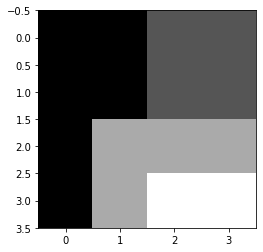

In [12]:
patternImage = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 2, 2, 2],
    [0, 2, 3, 3]], dtype=np.uint8)

plt.imshow(patternImage, cmap='gray')
plt.show()

We will use <a href="https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=lbp#skimage.feature.greycomatrix">greycomatrix</a> function from scikit-image to extract GLCM from the sample pattern.

In [13]:
co_ocmatrix = greycomatrix(patternImage, distances=[1], angles=[0, np.pi/4, np.pi/2], levels=4)
# distance = 1 คือเอาติดกันเลย
# levels : possible value 
# angle: ตามเข็ม
print('angle 0')
print(co_ocmatrix[:,:,0,0])

print('angle 45')
print(co_ocmatrix[:,:,0,1])

print('angle 90')
print(co_ocmatrix[:,:,0,2])

angle 0
[[2 2 2 0]
 [0 2 0 0]
 [0 0 2 1]
 [0 0 0 1]]
angle 45
[[1 1 3 0]
 [0 1 1 0]
 [0 0 0 2]
 [0 0 0 0]]
angle 90
[[4 0 1 0]
 [0 2 2 0]
 [0 0 1 2]
 [0 0 0 0]]


### GLCM texture properties
Fron the  GLCM we can compute the following texture properties by using <a href=''>greycoprops</a> from scikit-image
- contrast $\sum_{i,j=0}^{levels-1} P_{i,j}(i-j)^2$
- dissimilarity $\sum_{i,j=0}^{levels-1}P_{i,j}|i-j|$
- homogeneity $\sum_{i,j=0}^{levels-1}\frac{P_{i,j}}{1+(i-j)^2}$
- correlation $\sum_{i,j=0}^{levels-1} P_{i,j}\left[\frac{(i-\mu_i)(j-\mu_j)}{\sqrt{(\sigma_i^2)(\sigma_j^2)}}\right]$

In [14]:
contrast = greycoprops(co_ocmatrix, prop='contrast')
dissimilarity = greycoprops(co_ocmatrix, prop='dissimilarity')

print(contrast, dissimilarity)

[[0.91666667 1.77777778 0.66666667]] [[0.58333333 1.11111111 0.5       ]]


In [15]:
patternImage2 = np.zeros((4,4), dtype=np.uint8) ## all black image!
co_ocmatrix2 = greycomatrix(patternImage2, distances=[1], angles=[0, np.pi/4, np.pi/2])

contrast2 = greycoprops(co_ocmatrix2, prop='contrast')
dissimilarity2 = greycoprops(co_ocmatrix2, prop='dissimilarity')
homogeneity2 = greycoprops(co_ocmatrix2, prop='homogeneity')

print(contrast2, dissimilarity2, homogeneity2)

[[0. 0. 0.]] [[0. 0. 0.]] [[1. 1. 1.]]


### Co-Occurrence matrix patch matching on bridge defect problem

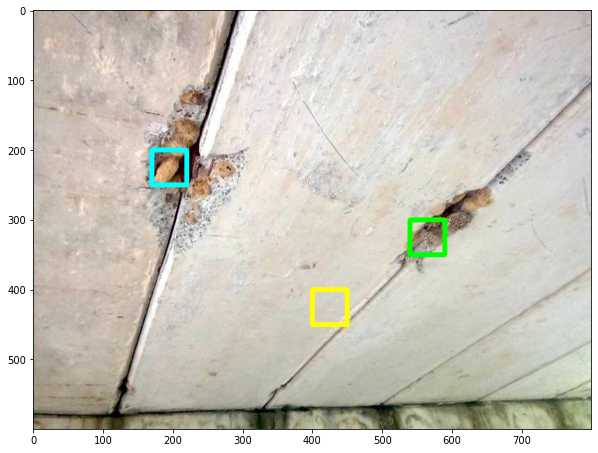

In [16]:
bridgeDefectImage = cv2.imread('assets/Lab5-crack.jpg')
dispImage = cv2.cvtColor(bridgeDefectImage.copy(), cv2.COLOR_BGR2RGB)

# Sample crack
cv2.rectangle(dispImage, (170,200), (220,250), (0,255,255), 5)

# Normal1
cv2.rectangle(dispImage, (400,400), (450,450), (255,255,0), 5)

# Crack2
cv2.rectangle(dispImage, (540,300), (590,350), (0,255,0), 5)


plt.figure(figsize=(10,10))
plt.imshow(dispImage, cmap='gray')

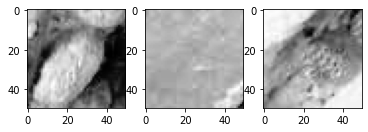

In [17]:
bridgeDefectImageGray = cv2.cvtColor(bridgeDefectImage, cv2.COLOR_BGR2GRAY)

# classify สีฟ้า 

crackPatch1 = bridgeDefectImageGray[200:250,170:220]

normalPatch1= bridgeDefectImageGray[400:450,400:450]

crackPatch2 = bridgeDefectImageGray[300:350,540:590]

_, axarr = plt.subplots(1,3)
axarr[0].imshow(crackPatch1, cmap='gray')
axarr[1].imshow(normalPatch1, cmap='gray')
axarr[2].imshow(crackPatch2, cmap='gray')

In [18]:
co_ocmatrix_crackpatch1 = greycomatrix(crackPatch1, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

co_ocmatrix_normalpatch1 = greycomatrix(normalPatch1, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

co_ocmatrix_crackpatch2 = greycomatrix(crackPatch2, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

In [19]:
dist_normal_normal = np.linalg.norm(co_ocmatrix_crackpatch1-co_ocmatrix_crackpatch2)  # euclidean distance
print('distance crack-crack', dist_normal_normal)

dist_normal_crack = np.linalg.norm(co_ocmatrix_crackpatch1-co_ocmatrix_normalpatch1)
print('distance normal-crack', dist_normal_crack)

distance crack-crack 0.04674394760128211
distance normal-crack 0.1884948283571507


## Local Binary Pattern (LBP)
Local Binary Pattern (LBP) is a efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.  It can be seen as a unifying approach to the traditionally divergent statistical and structural models of texture analysis. The most important property of the LBP operator in real-world applications is its robustness to monotonic gray-scale changes caused, for example, by illumination variations. Another important property is its computational simplicity, which makes it possible to analyze images in challenging real-time settings.

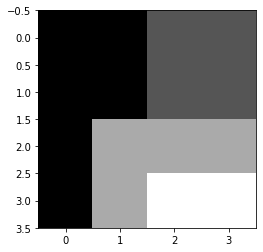

In [20]:
patternImage = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 2, 2, 2],
    [0, 2, 3, 3]], dtype=np.uint8)

plt.imshow(patternImage, cmap='gray')
plt.show()

In [21]:
lbpfeature = local_binary_pattern(patternImage, 8, 1)

[[255. 255. 193. 112.]
 [255. 255. 231. 124.]
 [255. 193. 241. 112.]
 [255.   7.   1.  16.]]


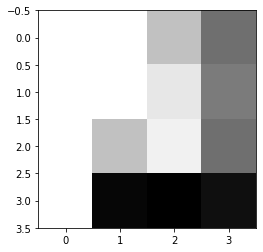

In [22]:
plt.imshow(lbpfeature, cmap='gray')
print(lbpfeature)

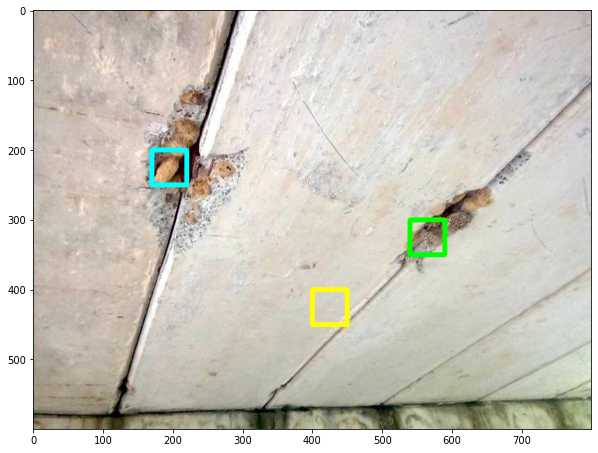

In [23]:
bridgeDefectImage = cv2.imread('assets/Lab5-crack.jpg')
dispImage = cv2.cvtColor(bridgeDefectImage.copy(), cv2.COLOR_BGR2RGB)

# Sample crack
cv2.rectangle(dispImage, (170,200), (220,250), (0,255,255), 5)

# Normal1
cv2.rectangle(dispImage, (400,400), (450,450), (255,255,0), 5)

# Crack2
cv2.rectangle(dispImage, (540,300), (590,350), (0,255,0), 5)


plt.figure(figsize=(10,10))
plt.imshow(dispImage, cmap='gray')

Calculate LBP pattern for each patch by using scikit-image <a href="https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=lbp#skimage.feature.local_binary_pattern">local_binary_pattern</a> <br>
<img src="assets/Lab5-LBP.jpg"/><br> Three neighborhood examples with varying p and r used to construct Local Binary Patterns. (Image from <a href="https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/">pyimagesearch</a>)

In [24]:
lbp_crackpatch1 =  local_binary_pattern(crackPatch1, P=16, R=8, method='uniform') 
lbp_normalpatch1 =  local_binary_pattern(normalPatch1, P=16, R=8, method='uniform')
lbp_crackpatch2 =  local_binary_pattern(crackPatch2, P=16, R=8, method='uniform') 

### LBP histogram

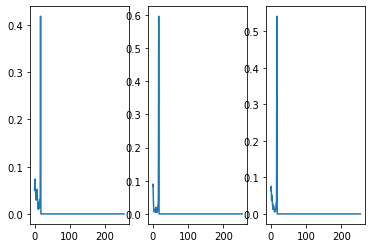

In [25]:
nBin = 255

_, axarr = plt.subplots(1,3)

hist_crackpatch1, _ = np.histogram(lbp_crackpatch1, density=True, bins=nBin, range=(0, nBin))
axarr[0].plot(hist_crackpatch1)

hist_normalpatch1, _ = np.histogram(lbp_normalpatch1, density=True, bins=nBin, range=(0, nBin))
axarr[1].plot(hist_normalpatch1)
    
hist_crackpatch2, _ = np.histogram(lbp_crackpatch2, density=True, bins=nBin, range=(0, nBin))
axarr[2].plot(hist_crackpatch2)

plt.show()

### LBP Histogram matching

#### Simple euclidean distance

In [26]:
print('Eucliden distance between crack-crack',np.linalg.norm(hist_crackpatch1 - hist_crackpatch2))
print('Eucliden distance between crack-normal',np.linalg.norm(hist_crackpatch1 - hist_normalpatch1))

Eucliden distance between crack-crack 0.13803188037551323
Eucliden distance between crack-normal 0.20234702864139123


#### KL divergence is a way of measuring the matching between two distributions 
(More detail can  be read from <a href="https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-kl-divergence-2b382ca2b2a8">here</a>)

In [27]:
def kldivergence(p, q):
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

print('KL-Divergence between crack-crack', kldivergence(hist_crackpatch1 , hist_crackpatch2))
print('KL-Divergence between crack-normal', kldivergence(hist_crackpatch1 , hist_normalpatch1))

KL-Divergence between crack-crack 0.1533572225978422
KL-Divergence between crack-normal 0.3860063087797492


Texture Segmentation

thr task is to implement a program to segment this leopard from the background by using chosen texture feature and sliding window method.
<img src="assets/Lab5-leopard.jpg"/>

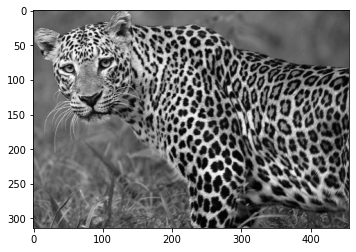

<Figure size 432x288 with 0 Axes>

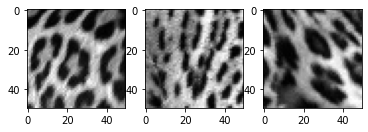

<Figure size 432x288 with 0 Axes>

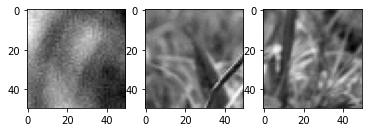

In [ ]:
leopardImage = cv2.imread('assets/Lab5-leopard.jpg', cv2.IMREAD_GRAYSCALE)
leopardImage = cv2.resize(leopardImage, None,fx=0.5,fy=0.5) #resize to reduce computation time

# Just sample patches, you can change to any position you want
leopardPatch1 = leopardImage[100:150,400:450]
leopardPatch2 = leopardImage[100:150,150:200]
leopardPatch3 = leopardImage[200:250,300:350]

nonleopardPatch1 = leopardImage[0:50,400:450]
nonleopardPatch2 = leopardImage[250:300,0:50]
nonleopardPatch3 = leopardImage[250:300,100:150]


plt.figure()
plt.imshow(leopardImage, cmap='gray')

plt.figure()
_, axarr = plt.subplots(1,3)
axarr[0].imshow(leopardPatch1, cmap='gray')
axarr[1].imshow(leopardPatch2, cmap='gray')
axarr[2].imshow(leopardPatch3, cmap='gray')

plt.figure()
_, axarr = plt.subplots(1,3)
axarr[0].imshow(nonleopardPatch1, cmap='gray')
axarr[1].imshow(nonleopardPatch2, cmap='gray')
axarr[2].imshow(nonleopardPatch3, cmap='gray')

In [ ]:
import torch

In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet152', pretrained=True)
model.eval()
print(model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
print(model.layer4)

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): 

In [ ]:
# https://stackoverflow.com/questions/52796121/how-to-get-the-output-from-a-specific-layer-from-a-pytorch-model
# https://discuss.pytorch.org/t/how-can-l-load-my-best-model-as-a-feature-extractor-evaluator/17254/5
# https://pytorch.org/tutorials/beginner/former_torchies/nnft_tutorial.html
# select specific layer


layer4_output = None    
def get_layer(self,input,output): 
  global layer4_output
  layer4_output = output.detach()
  # print(output.shape)

model.layer4.register_forward_hook(get_layer)

In [ ]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

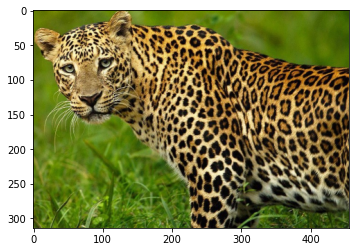

<Figure size 432x288 with 0 Axes>

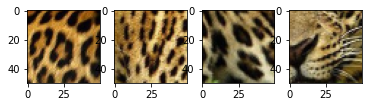

<Figure size 432x288 with 0 Axes>

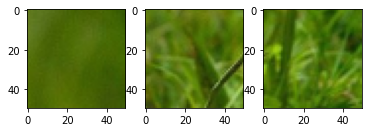

In [ ]:
leopardImage = cv2.imread('assets/Lab5-leopard.jpg')
leopardImage = cv2.resize(leopardImage, None,fx=0.5,fy=0.5) #resize to reduce computation time

leopardImage = cv2.cvtColor(leopardImage, cv2.COLOR_BGR2RGB)


# Just sample patches, you can change to any position you want
leopardPatch1 = leopardImage[100:150,400:450]
leopardPatch2 = leopardImage[100:150,150:200]
leopardPatch3 = leopardImage[200:250,300:350]
leopardPatch4 = leopardImage[100:150,80:130]

nonleopardPatch1 = leopardImage[0:50,400:450]
nonleopardPatch2 = leopardImage[250:300,0:50]
nonleopardPatch3 = leopardImage[250:300,100:150]
nonleopardPatch4 = leopardImage[250:300,100:150]

plt.figure()
plt.imshow(leopardImage)

plt.figure()
_, axarr = plt.subplots(1,4)
axarr[0].imshow(leopardPatch1)
axarr[1].imshow(leopardPatch2)
axarr[2].imshow(leopardPatch3)
axarr[3].imshow(leopardPatch4)

plt.figure()
_, axarr = plt.subplots(1,3)
axarr[0].imshow(nonleopardPatch1)
axarr[1].imshow(nonleopardPatch2)
axarr[2].imshow(nonleopardPatch3)

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def images_batcher(images):
  return  torch.stack( [ preprocess(Image.fromarray(img)) for img in images])

leopard_patches = [ leopardPatch1,leopardPatch2,leopardPatch3,leopardPatch4]
nonleopard_patches = [ nonleopardPatch1, nonleopardPatch2,nonleopardPatch3] 

leopard_patches_batch = images_batcher(leopard_patches)
nonleopard_patchse_batch = images_batcher(nonleopard_patches)

In [ ]:
with torch.no_grad():
    output_leopard_batch = model(leopard_patches_batch)
    layer4_output_leopard_batch = layer4_output
    output_nonleopard_batch = model(nonleopard_patchse_batch)
    layer4_output_nonleopard_batch = layer4_output

In [ ]:
f_leo = layer4_output_leopard_batch
f_nonleo = layer4_output_nonleopard_batch

In [ ]:
def manhattan(l1,l2):
  return torch.abs(torch.sum(l1-l2))
def euclidean(l1,l2):
  return torch.sum((l1 - l2)**2)

print("manhattan")
print(manhattan(f_leo[0],f_nonleo[1]))
print(manhattan(f_leo[1],f_nonleo[1]))
print(manhattan(f_leo[0],f_leo[1]) )
print(manhattan(f_nonleo[0],f_nonleo[1]) )
print("euclidean")
print(euclidean(f_leo[0],f_nonleo[1]))
print(euclidean(f_leo[1],f_nonleo[1]))
print(euclidean(f_leo[0],f_leo[1]) )
print(euclidean(f_nonleo[0],f_nonleo[1]) )

manhattan
tensor(10125.1895)
tensor(9689.7461)
tensor(435.4446)
tensor(7336.1973)
euclidean
tensor(83870.0859)
tensor(83691.5703)
tensor(28961.1094)
tensor(47094.5078)


In [ ]:
def plot_img(imgs,title=None):
  if isinstance(imgs,list):
    for img in imgs: 
        plt.imshow(img)
        plt.show()
    return  
  plt.show()
  plt.imshow(imgs)
  if title: plt.title(title)
  plt.show()

def sliding_window(img,w_size):
  w,h = w_size 
  W,H = img.shape[:-1]
  patches = {}
  plt.figure()
  _, axarr = plt.subplots(W//w,H//h)
  for ii,i in enumerate(range(0,W-w,w)):
    for jj,j in enumerate(range(0,H-h,h)):
      axarr[ii,jj].imshow(img[i:i+w,j:j+h])
      patches[(ii,jj)] = [(i,i+w,j,j+h),img[i:i+w,j:j+h] ] 
      #plot_img(img[i:i+w,j:j+h])
  return patches
  

<Figure size 432x288 with 0 Axes>

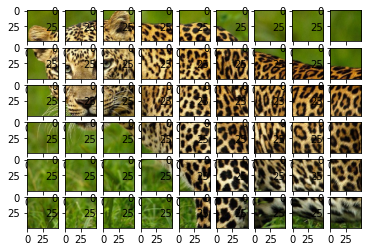

In [ ]:
windows = sliding_window(leopardImage,(50,50))

<Figure size 432x288 with 0 Axes>

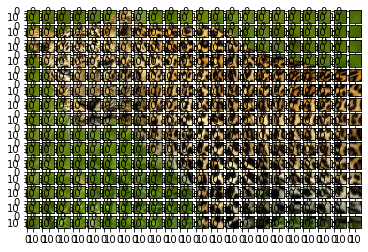

In [ ]:
patches = sliding_window(leopardImage,(20,20))

In [ ]:
leo_indices = [(2,0),(5,2),(6,4),(7,21),(7,18),(7,20),(0,6),(2,12),(8,12),(12,12),(5,3),(10,16)]
nonleo_indices = [(5,0), (10,0), (14,4), (12,3), (10,7), (10,8),(11,0),(11,4),(12,5),(0,3),(11,2),(13,8)] 
leo_patches =  [ patches[(i,j)][-1] for (i,j) in leo_indices ] 
nonleo_patches =   [ patches[(i,j)][-1] for (i,j) in nonleo_indices ] 

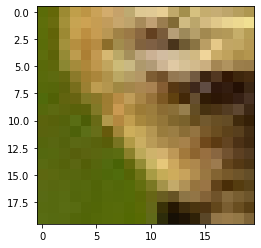

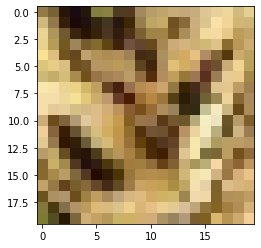

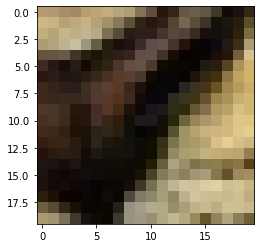

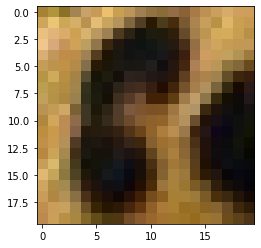

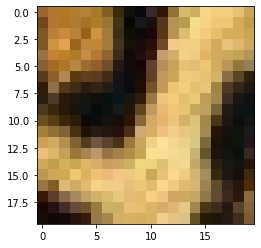

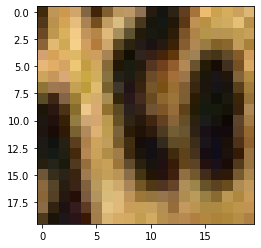

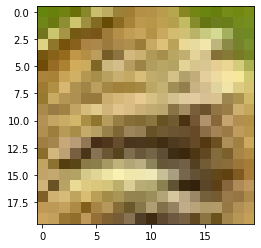

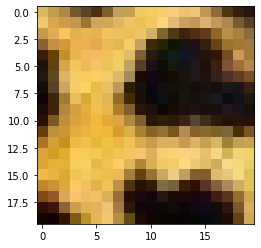

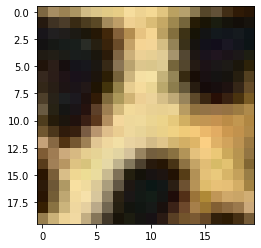

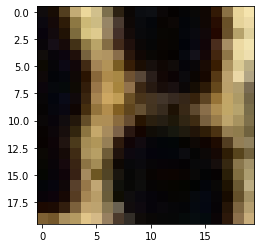

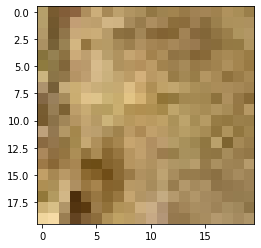

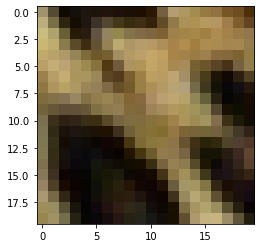

In [ ]:
plot_img(leo_patches)

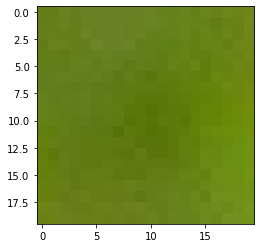

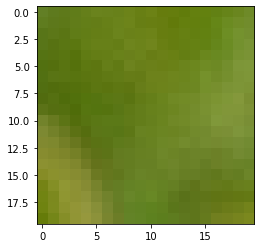

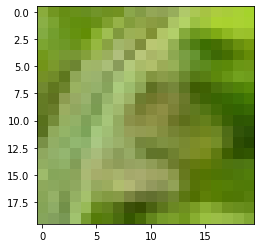

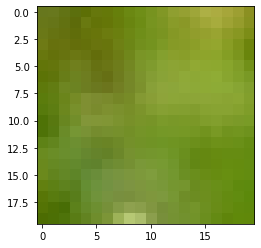

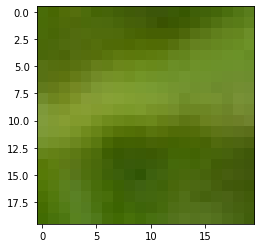

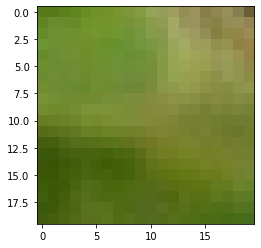

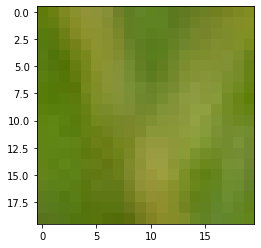

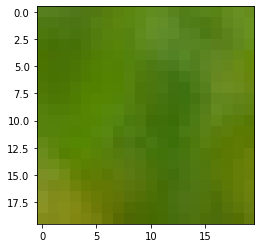

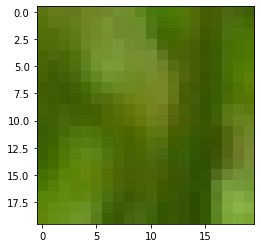

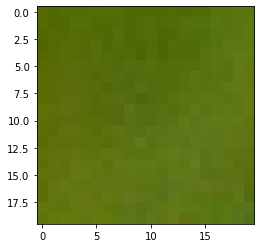

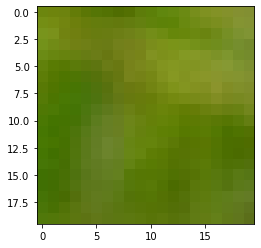

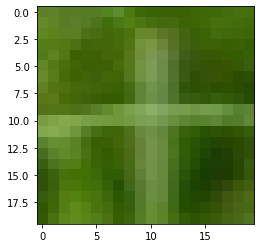

In [ ]:
plot_img(nonleo_patches)

In [ ]:
leo_batch = images_batcher(leo_patches)
nonleo_batch = images_batcher(nonleo_patches)

In [ ]:
leo_output = model(leo_batch)
f_leo = layer4_output
nonleo_output = model(nonleo_batch)
f_nonleo = layer4_output

In [ ]:
def manhattan(t1,t2):
  return np.asscalar(torch.abs(torch.sum(t1-t2)).numpy())
def euclidean(t1,t2):
  return np.asscalar(torch.sum((t1 - t2)**2).numpy())

def knn(probe,C1,C2, k,method='l1'):
  D = manhattan if method=='l1' else euclidean
  c1_distances =  [ D(probe,c1) for c1 in C1 ]
  c2_distances =  [ D(probe,c2) for c2 in C2 ]
  # print(f"c1 distance:\n {c1_distances}")
  # print(f"c2 distance:\n {c2_distances}")
  dis = []
  dis += [ (c1_d,0) for c1_d in c1_distances ]
  dis += [ (c2_d,1) for c2_d in c2_distances ]
  dis.sort()
  # print(dis)
  s = sum([ d[1] for d in dis[:k]])
  # print(s)
  if s > k//2: return 'c2'
  return 'c1'

In [ ]:
total_indices = []; total_imgs = []
for index,img in patches.values():
  total_indices.append(index)
  total_imgs.append(img)


In [ ]:
# only if your gpu/cpu has a lot of RAM (memory-intensive)
# total_img_batch = images_batcher(total_imgs)
# total_output = model(total_img_batch)
# f_total = layer4_output

In [ ]:
# sequential (slow)
single_batch = [ preprocess(Image.fromarray(img)) for img in  total_imgs ]

0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
330it [03:49,  1.44it/s]


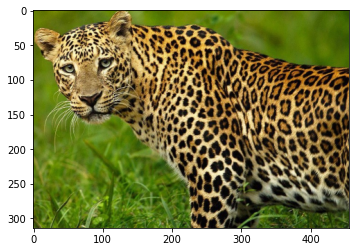

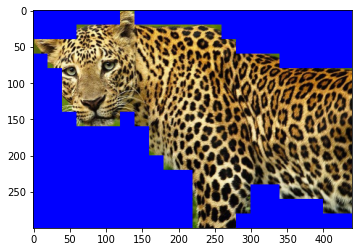

In [ ]:
import copy
leopardImage = cv2.imread('assets/Lab5-leopard.jpg')
leopardImage = cv2.resize(leopardImage, None,fx=0.5,fy=0.5) #resize to reduce computation time
leopardImage = cv2.cvtColor(leopardImage, cv2.COLOR_BGR2RGB)
segment_img = copy.deepcopy(leopardImage)

from tqdm import tqdm
for img,index in tqdm(zip(single_batch,total_indices)):
  output = model(img.unsqueeze(0))
  feature = layer4_output[0]
  if knn(feature,f_leo,f_nonleo,10,method='l2') == 'c2':
    i,i_w,j,j_h  =  index
    segment_img[i:i_w,j:j_h] = [0,0,255]
window_size = (20,20)
h,w = window_size
H,W = segment_img.shape[:-1]
plot_img(leopardImage)
plot_img(segment_img[:h*(H//h),:w*(W//w)])

Overview of the segmentation algorithm.

<p> first, the image is divided into several patches. (22 out of 330 patches)
<p> then, some patches are selected to be the classified patches.
<p> the patches are then fed to the CNN-based feature extractor which is ResNet. 
<p> after that, KNN algorithm is performed to the extracted features. 

Note:
the accuracy of the segmentation here is heavily on feature extractor performance, ResNet152 is much better than ResNet50.

you may try using the smaller window size for the higher segmentation resolution.

In [ ]:
cv2.imwrite('output.jpg',cv2.cvtColor(segment_img[:h*(H//h),:w*(W//w)], cv2.COLOR_RGB2BGR) )

True